# Decision trees - Classification 

## DecisionTree Classifier from Sklearn Library

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

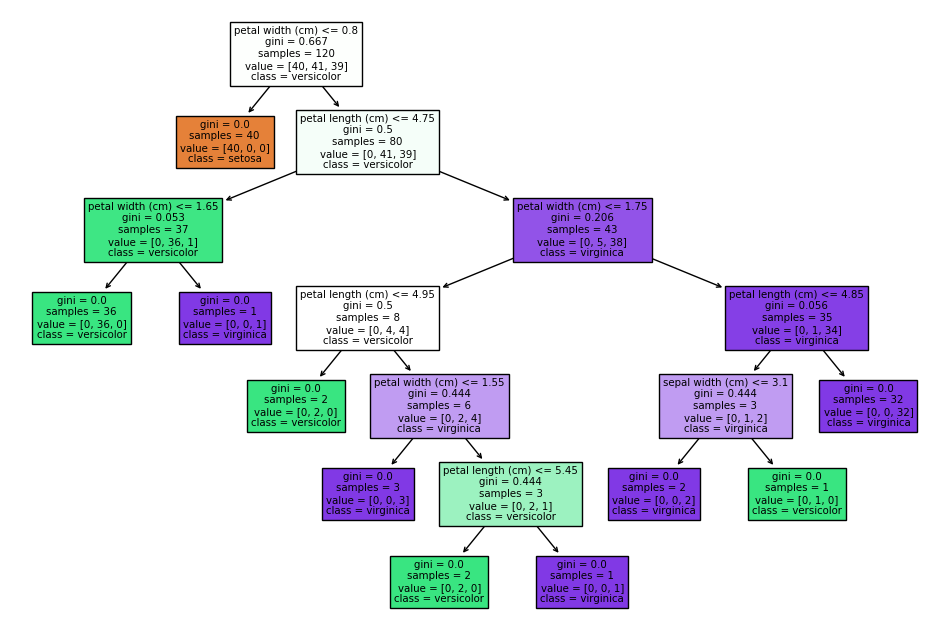

In [2]:
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
tree.plot_tree(clf_gini, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()


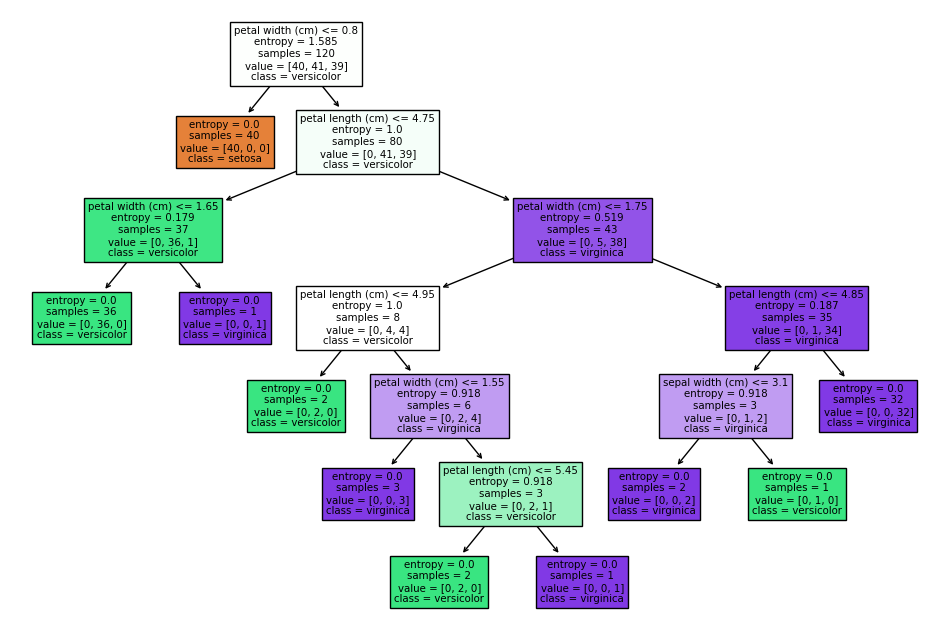

In [3]:
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
tree.plot_tree(clf_entropy, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

## Decision Tree without using Sklearn Library

In [5]:
feature_names = iris.feature_names
print("Feature names:", feature_names)

print("First few rows of the dataset:")
print(X[:5])

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
First few rows of the dataset:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [6]:
import numpy as np

species = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

def calculate_entropy(target):
    classes, counts = np.unique(target, return_counts=True)
    probabilities = counts / len(target)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

entropy_species = calculate_entropy(species)
print("Entropy of species:", entropy_species)


Entropy of species: 1.584962500721156


In [7]:
sepal_length = np.array([5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 7.0, 6.4, 6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2])
sepal_width = np.array([3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.2, 3.2, 3.1, 2.3, 2.8, 3.0, 2.9, 2.5, 3.0, 2.7, 3.3, 2.7, 3.0, 2.9, 2.5, 3.0, 3.4, 3.0, 3.1, 3.1])
petal_length = np.array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 4.7, 4.5, 4.9, 4.0, 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 5.7, 4.2, 5.7, 4.9, 4.0, 4.7, 4.3, 4.4, 4.8, 5.0])
petal_width = np.array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 1.4, 1.5, 1.5, 1.3, 1.5, 1.3, 1.6, 1.0, 1.3, 1.0, 2.5, 1.9, 2.1, 1.8, 2.2, 2.1, 1.7, 1.8, 1.8, 2.5])

def calculate_information_gain(feature, target, parent_entropy):
    unique_values, counts = np.unique(feature, return_counts=True)
    probabilities = counts / len(feature)
    weighted_entropy = 0
    
    for value, prob in zip(unique_values, probabilities):
        subset_target = target[feature == value]
        entropy = calculate_entropy(subset_target)
        weighted_entropy += prob * entropy
    
    information_gain = parent_entropy - weighted_entropy
    return information_gain

info_gain_sepal_length = calculate_information_gain(sepal_length, species, entropy_species)
info_gain_sepal_width = calculate_information_gain(sepal_width, species, entropy_species)
info_gain_petal_length = calculate_information_gain(petal_length, species, entropy_species)
info_gain_petal_width = calculate_information_gain(petal_width, species, entropy_species)

print("Information Gain for Sepal Length:", info_gain_sepal_length)
print("Information Gain for Sepal Width:", info_gain_sepal_width)
print("Information Gain for Petal Length:", info_gain_petal_length)
print("Information Gain for Petal Width:", info_gain_petal_width)


Information Gain for Sepal Length: 1.2264662506490405
Information Gain for Sepal Width: 0.5639894846181333
Information Gain for Petal Length: 1.3597995839823738
Information Gain for Petal Width: 1.584962500721156


## Using Decision Trees for Both Classification and Regression 

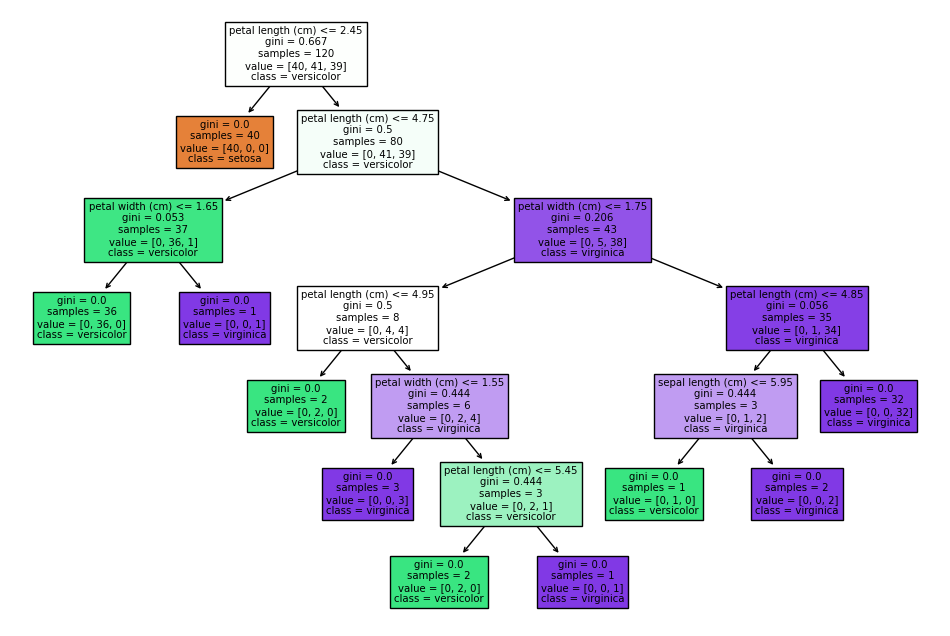

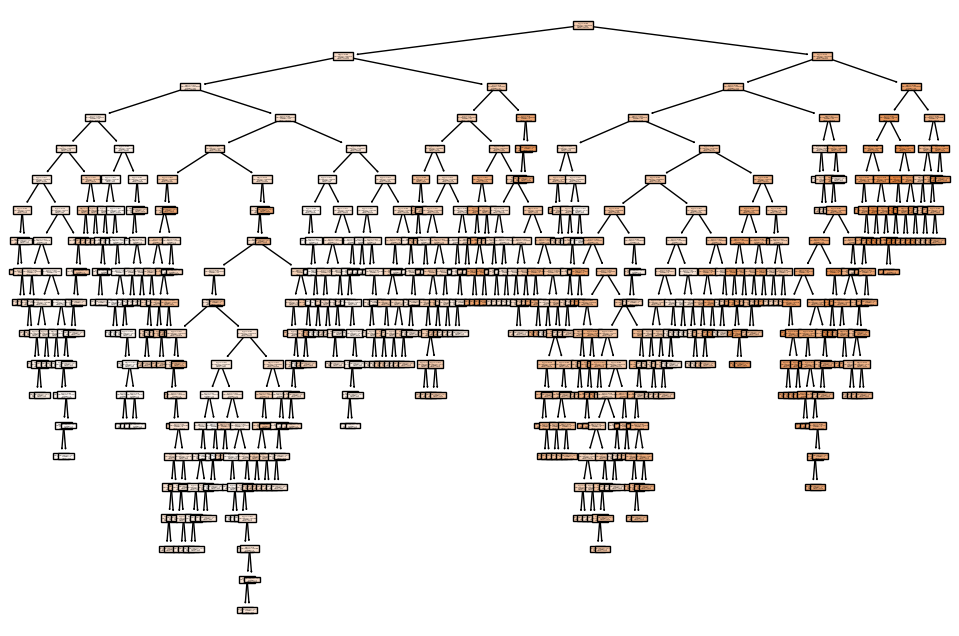

In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt

iris = load_iris()
X_classification = iris.data
y_classification = iris.target

X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

clf_classification = DecisionTreeClassifier()
clf_classification.fit(X_train_classification, y_train_classification)

plt.figure(figsize=(12, 8))
tree.plot_tree(clf_classification, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()


diabetes = load_diabetes()
X_regression = diabetes.data
y_regression = diabetes.target

X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

clf_regression = DecisionTreeRegressor()
clf_regression.fit(X_train_regression, y_train_regression)

plt.figure(figsize=(12, 8))
tree.plot_tree(clf_regression, filled=True)
plt.show()

### Decision Tree for Regression Model
Since the Decision Tree for the Regression Model is very big it has become difficult to visualise it, now there are two ways to handle this problem. One alternative is to visualize only a portion of the tree, focusing on the most important nodes. Another approach is to limit the depth of the tree during training to prevent it from growing too large.
Here I am plotting the Trees from both the methods.

### First Approach Focusing on the important features
This can be done by adding the max_depth parameter to limit the depth of the decision tree for regression and the max_features parameter to control the number of features shown in the tree plot. 

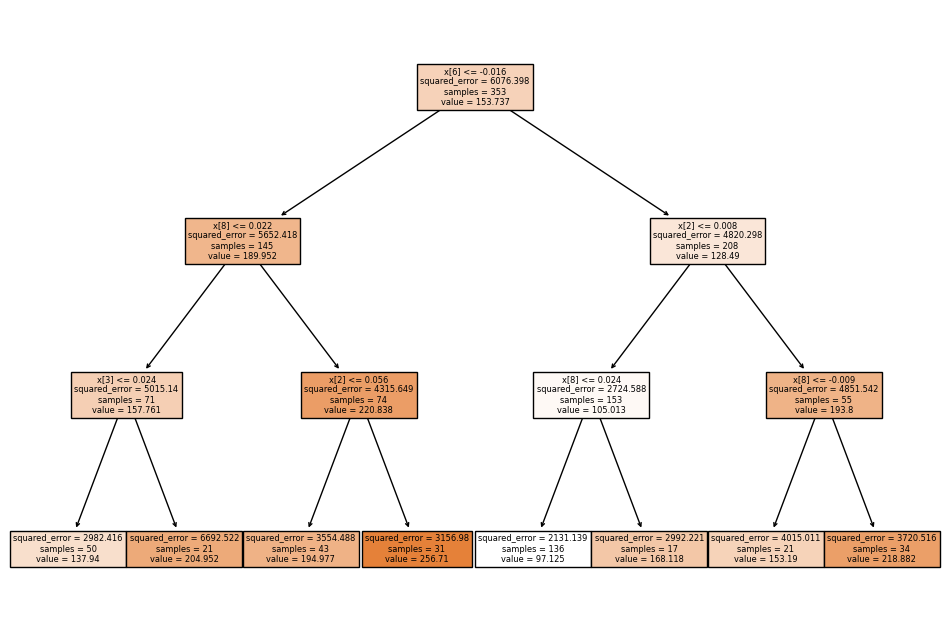

In [10]:
# Create and fit Decision Tree Regressor with limited depth and features
clf_regression = DecisionTreeRegressor(max_depth=3, max_features=4)
clf_regression.fit(X_train_regression, y_train_regression)

# Visualize decision tree for regression
plt.figure(figsize=(12, 8))
tree.plot_tree(clf_regression, filled=True)
plt.show()

### Second Appoarch 
Here we just add the max depth parameter to control the depth of the Decision Tree

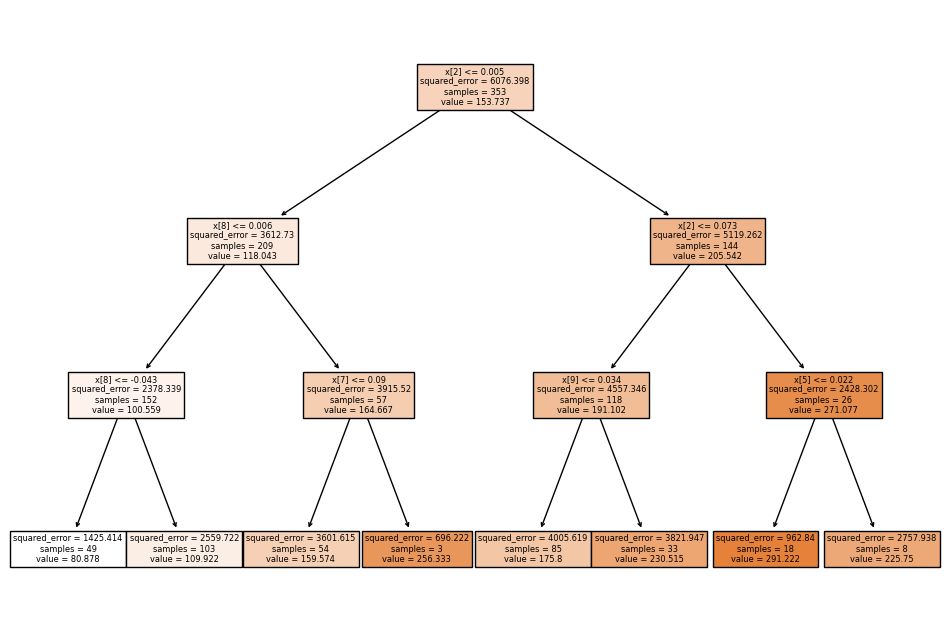

In [11]:
# Create and fit Decision Tree Regressor with limited depth
clf_regression = DecisionTreeRegressor(max_depth=3)
clf_regression.fit(X_train_regression, y_train_regression)

# Visualize decision tree for regression
plt.figure(figsize=(12, 8))
tree.plot_tree(clf_regression, filled=True)
plt.show()